<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyze-properties-of-the-interface-of-the-propagating-front-of-OsxGFP-positive-cells" data-toc-modified-id="Analyze-properties-of-the-interface-of-the-propagating-front-of-OsxGFP-positive-cells-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyze properties of the interface of the propagating front of OsxGFP positive cells</a></span><ul class="toc-item"><li><span><a href="#Load-image" data-toc-modified-id="Load-image-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load image</a></span></li><li><span><a href="#Extract-interface-profile" data-toc-modified-id="Extract-interface-profile-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Extract interface profile</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Thresholding-with-Fiji" data-toc-modified-id="Thresholding-with-Fiji-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Thresholding with Fiji</a></span></li><li><span><a href="#Plot-as-3D-parametric-plot-to-check-how-data-is-ordered" data-toc-modified-id="Plot-as-3D-parametric-plot-to-check-how-data-is-ordered-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Plot as 3D parametric plot to check how data is ordered</a></span></li><li><span><a href="#Overhang-correction" data-toc-modified-id="Overhang-correction-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span>Overhang correction</a></span></li><li><span><a href="#Compare-interfaces:-(2)-obtained-from-different-tolerances" data-toc-modified-id="Compare-interfaces:-(2)-obtained-from-different-tolerances-1.2.0.4"><span class="toc-item-num">1.2.0.4&nbsp;&nbsp;</span>Compare interfaces: (2) obtained from different tolerances</a></span></li></ul></li></ul></li><li><span><a href="#Calculate-fractal-dimension" data-toc-modified-id="Calculate-fractal-dimension-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calculate fractal dimension</a></span></li><li><span><a href="#Scaling-analysis" data-toc-modified-id="Scaling-analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Scaling analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Literature" data-toc-modified-id="Literature-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Literature</a></span></li></ul></li><li><span><a href="#Validity-of-scaling-analysis" data-toc-modified-id="Validity-of-scaling-analysis-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Validity of scaling analysis</a></span><ul class="toc-item"><li><span><a href="#(1)-Family-Vicsek-scaling" data-toc-modified-id="(1)-Family-Vicsek-scaling-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>(1) Family-Vicsek scaling</a></span></li><li><span><a href="#(2)-Fractal-dimension" data-toc-modified-id="(2)-Fractal-dimension-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>(2) Fractal dimension</a></span></li></ul></li><li><span><a href="#Method-1:-calculate-exponents-from-interface-width" data-toc-modified-id="Method-1:-calculate-exponents-from-interface-width-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Method 1: calculate exponents from interface width</a></span><ul class="toc-item"><li><span><a href="#Special-case:-l-=-L" data-toc-modified-id="Special-case:-l-=-L-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Special case: l = L</a></span></li></ul></li><li><span><a href="#Method-2:-calculate-exponents-from-structure-factor" data-toc-modified-id="Method-2:-calculate-exponents-from-structure-factor-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Method 2: calculate exponents from structure factor</a></span><ul class="toc-item"><li><span><a href="#Plot-for-different-tolerances" data-toc-modified-id="Plot-for-different-tolerances-1.4.3.1"><span class="toc-item-num">1.4.3.1&nbsp;&nbsp;</span>Plot for different tolerances</a></span></li><li><span><a href="#Fourier-space-length-scales" data-toc-modified-id="Fourier-space-length-scales-1.4.3.2"><span class="toc-item-num">1.4.3.2&nbsp;&nbsp;</span>Fourier space length scales</a></span></li></ul></li></ul></li><li><span><a href="#Analyse-islands" data-toc-modified-id="Analyse-islands-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Analyse islands</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#(1)-Count-islands" data-toc-modified-id="(1)-Count-islands-1.5.0.1"><span class="toc-item-num">1.5.0.1&nbsp;&nbsp;</span>(1) Count islands</a></span></li><li><span><a href="#(2)-Get-nearest-neighbour-distances" data-toc-modified-id="(2)-Get-nearest-neighbour-distances-1.5.0.2"><span class="toc-item-num">1.5.0.2&nbsp;&nbsp;</span>(2) Get nearest-neighbour distances</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Analyze properties of the interface of the propagating front of OsxGFP positive cells

<b>Version control</b><br>
v1: No overhang control. Use magic wand definitions or threshold definitions of interface. <br>
v2 (current): overhang control. Use thresholded binary image, take largest contiguous region.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
from numpy import fft
import os
cwd = os.getcwd(); print("Working dir: " + cwd)
save_folder = os.path.split(cwd)[0] + "/Figures/"; print("Save plots in: " + save_folder)

Working dir: /Users/dang/Documents/Projects/Tabler_skull/Scripts/Scripts_python
Save plots in: /Users/dang/Documents/Projects/Tabler_skull/Scripts/Figures/


In [2]:
# Image settings
size = np.array([593.74, 758.12]); # total size of image in microns
pix_per_micron = 9.6355; # number of pixels per micron

In [3]:
# Make plots interactive
%matplotlib notebook
# For 3D plots:
# %matplotlib widget

In [4]:
# Make plots static 
%matplotlib inline

## Load image

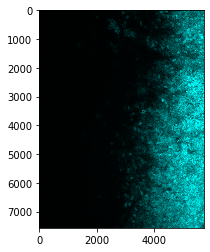

In [6]:
# Load image
im_path = "/Users/dang/Documents/TablerLab/Data_Adrian_270120/";
im_fname = "270120_mTmG_OsxCRE_FrontImaging_MaxIntensity_processed_YD_adjusted";
im_label = "270120_mTmG_OsxCRE_"; # label for image, used for saving results
ext = ".tif";
img=mpimg.imread(im_path + im_fname + ext)
imgplot = plt.imshow(img)

## Extract interface profile
Numerically define the interface profile from microscope image data. <br>

#### Thresholding with Fiji

The basic idea is to define the interface as the boundary of the largest contiguous region which has values of the measured quantity (i.e. GFP intensity) within a certain range. This contiguous region depends on how we set thresholds for when regions have 'similar' intensity. 

Obtain interface from magic wand selection in Fiji. Run Fiji macro "get_interface_profile.jim".
Data file from Fiji is a two-column .txt document with all x,y coordinates of selection, separated by \t

In [14]:
# Load Fiji data
data_path = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Data_Adrian_270120/Data_interfaces"

# Using tolerance
tolerance = 10000;
sample = 1;
#label_0 = "tolerance_" + str(tolerance) + "_sample_" + str(sample);
#fname_in = "270120_Interface_processed_YD_" + label_0 + ".txt";
label_0 = "threshold_auto_rm_outliers_r_20";

fname_in = "270120_Interface_processed_threshold_auto_removed_outliers_radius_20_contiguous_region.txt";

data_interface = pd.read_csv(data_path + fname_in, header = None, delimiter='\t');

Interface length L = 785.1201 microns


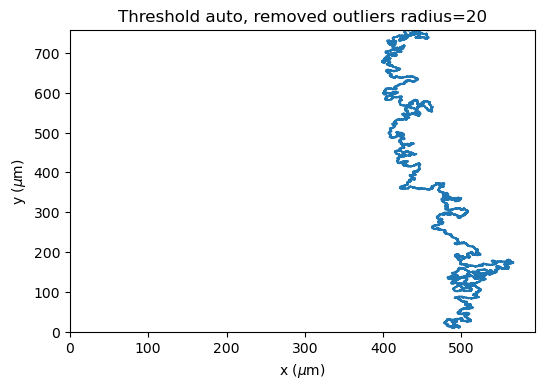

In [8]:
# remove non-interface boundaries of selected area
ymax = max(data_interface[1]);
ymin = min(data_interface[1]);
xmax = max(data_interface[0]);

# total length of interface (store for later)
L = ymax-ymin;
print("Interface length L = " + str(L) + " microns")

# margins for cutting out the three non-interface edges
margins = np.array([10, 10, 20]); # margins around edges
cond = ~(((round(data_interface[1])>=round(ymax)-margins[0]) | (round(data_interface[1])<= round(ymin)+margins[1]) | (round(data_interface[0])>=round(xmax)-margins[2])));

# slice data
mydata_interface_0 = data_interface[:][cond];

# Plot interface
h = plt.figure(1, dpi = 100);
p1 = plt.plot(mydata_interface_0[0], mydata_interface_0[1]);
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
plt.xlim(0, size[0])
plt.ylim(0, size[1])
#plt.title("Tolerance = " + str(tolerance) + ", selection " + str(sample))
plt.title("Threshold auto, removed outliers radius=20")

# Save image
fname_out = save_folder + label_0 + "interface_profile_tolerance_" + str(tolerance) + "_sample_" + str(sample);
ext = ".png";
#fname_out = save_folder + im_label + label_0;
#plt.savefig(fname_out + ext)

plt.show()

#### Plot as 3D parametric plot to check how data is ordered

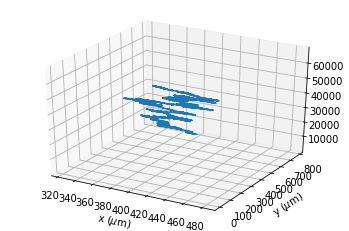

In [9]:
# Plot interface as parametric plot
N_datapoints = mydata_interface_0[0].size;
z_all = np.arange(1, N_datapoints+1);

h = plt.figure();
ax = h.gca(projection = '3d');

plt.plot(mydata_interface_0[0], mydata_interface_0[1], z_all);
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
#plt.zlabel('index')
#plt.xlim(0, size[0])
#plt.ylim(0, size[1])

plt.show()

#### Overhang correction

Note that the interface cannot be described as a single function h(y, t), because for any y there can be multiple interface points. Rather, it can be parametrized as a curve $\vec{x}(s, t)$, where $\vec{x} = (x, y)$ and $s$ is the variable along the curve. This makes direct comparison with interface processes difficult. <br>
Instead, we do an "overhang correction", by taking the first coordinate at which the contiguous region is reached from the direction perpendicular to the interface. The result is that we can then define an interface height function.

#### Compare interfaces: (2) obtained from different tolerances

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


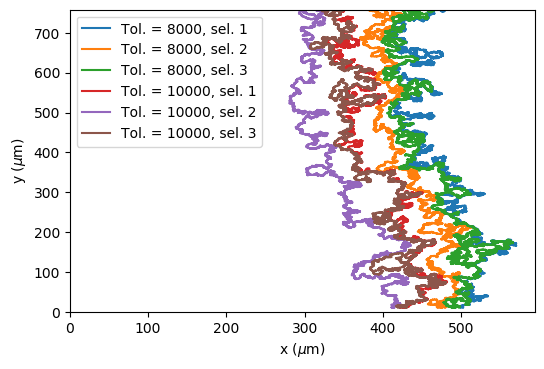

In [10]:
def process_interface(data_interface, margins):
    ymax = max(data_interface[1]);
    ymin = min(data_interface[1]);
    xmax = max(data_interface[0]);
    cond = ~(((round(data_interface[1])>=round(ymax)-margins[0]) | (round(data_interface[1])<=round(ymin)+margins[1]) | (round(data_interface[0])>=round(xmax)-margins[2])));
    mydata_interface = DataFrame.to_numpy(data_interface[:][cond]);
    return mydata_interface

# Parameters
tolerances_all = np.array([8000, 10000]);
selections_all = np.array([1, 2, 3]);
margins = np.array([10, 10, 20])
mydata_interface_all = []; 
parameters_all = []; # linear index with all parameters

for idx in np.arange(tolerances_all.size):
    for idx2 in np.arange(selections_all.size):
        tolerance = tolerances_all[idx];
        selection = selections_all[idx2];

        # Load Fiji data
        data_path = "/Users/dang/Documents/TablerLab/Data_Adrian_270120/Data_interfaces/";
        fname_in = "270120_Interface_processed_YD_tolerance_" + str(tolerance) + "_sample_" + str(selection) + ".txt";
        data_interface = pd.read_csv(data_path + fname_in, header = None, delimiter='\t');

        # Process data
        mydata_interface = process_interface(data_interface, margins).T;
        mydata_interface_all.append(mydata_interface);
        
        parameters_all.append([tolerance, selection])

# Plot all interfaces together
h = plt.figure(1, dpi = 100);
data_idx = 0;
for idx in np.arange(tolerances_all.size):
    for idx2 in np.arange(selections_all.size):
        this_label = "Tol. = " + str(tolerances_all[idx]) + ", sel. " + str(selections_all[idx2])
        plt.plot(mydata_interface_all[data_idx][0], mydata_interface_all[data_idx][1], label=this_label);
        data_idx = data_idx + 1;
        
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
plt.xlim(0, size[0])
plt.ylim(0, size[1])
plt.legend()

# Save image
fname_out = save_folder + im_label + "interface_profile_all_samples";
ext = ".png";
#plt.savefig(fname_out + ext)

plt.show()

## Calculate fractal dimension

Box-counting method

## Scaling analysis
We calculate the scaling exponents of the interface, to determine its universality class. There are different ways of obtaining the scaling exponents of an interface. Before that, we first verify that interface satisfies Family-Vicsek scaling, required for the scaling exponents to make sense.

#### Literature
<u>Books</u><br>
Barabasi & Stanley, Fractal Concepts in Surface Growth, 1995 <br>

<u>More recent papers</u><br>
Bacterial colonies: <a href="https://www.sciencedirect.com/science/article/pii/037843719090116A?via%3Dihub">Vicsek et al., 1990</a> (free growth), <a href="https://doi.org/10.1073/pnas.0710150104 ">Hallatschek et al., 2007</a> (competition) <br>
Tumour growth: <a href="https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.81.4008">Bru et al., PRL 1998</a> (rat brain tumours), <a href="https://www.sciencedirect.com/science/article/pii/S0006349503747158?via%3Dihub">Bru et al., Biophysical J. 2003</a> (15 cell lines, 16 tumour types), <a href="https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.248101#">Block et al., PRL 2007</a> (cellular automaton model) <br>
Cell colonies: <a href="https://journals.aps.org/pre/abstract/10.1103/PhysRevE.82.031903">Huergo et al. (2010) </a> (Velo cells),  <a href="dx.doi.org/10.1088/1367-2630/18/8/083020">Podewitz et al., New J. Phys. (2016)</a> (individual-based model)<br>


### Validity of scaling analysis

For the scaling arguments to work, the system needs to satisfy either of two conditions below.

#### (1) Family-Vicsek scaling
the Family-Viscek relation: <br>
$\hspace{1cm} w(L,t) \sim L^{\alpha} f\left(\frac{t}{L^z}\right)$ 

Check by plotting $w(L,t)/L^{\alpha}$ against $\frac{t}{L^z}$. Plot for different $L$ should collapse onto one curve.

In practice, how to obtain $L$-dependence of $w(L, t)$? 

#### (2) Fractal dimension
Alternatively, Bru et al. (2003) say that it is sufficient to check that the interface is fractal, by calculating the fractal dimensions and showing that it's a non-integer number.

### Method 1: calculate exponents from interface width
First, we can define a length-scale-dependent interface width <br>
$\hspace{1cm} w(l, t) =  \left( \frac{1}{l}  \sum_{h_i \in l} \left[ h_i(t) - \langle h_i \rangle_l \right]  \right)_L^{1/2}$ <br>
Not fully clear yet how to compute all these averages...

This quantity is proposed to have scaling relations <br>
$\hspace{1cm} w(l, t) \propto \begin{cases} t^{\beta} & \text{if } t \ll t_s \\ l^{\alpha} & \text{if } t \gg t_s \end{cases} $ <br>
This gives the roughness exponent $\alpha$ (in the long-time limit) and the growth exponent $\beta$ (short-time limit). The dynamic exponent $z$ is then related to these by the relation $z = \alpha/\beta$.

In practice, we can then obtain $\alpha$ by taking different lengths $l$ and compute local averages, to obtain $w(l)$ at a constant time. <br>
We would obtain $\beta$ from snapshots at different times $t$. However, this only works if we have data from the initial phase before the width saturates.

#### Special case: l = L
When $l = L$, the interface width becomes <br>
$w(t) := \sqrt{\langle h^2\rangle - \langle h \rangle^2} = \left[ \frac{1}{L} \int_{0}^{L} dx \left( h(x,t) - \bar{h}(t) \right)^2 \right]^{1/2} $


In [11]:
h_all = mydata_interface_0[0]; # x-positions give interface height
width = np.std(h_all);
print('Interface width = ' + str(round(width, 2)) + ' microns')

Interface width = 42.15 microns


In [12]:
# Do for all thresholds
for idx in np.arange(len(parameters_all)):
    print("Tolerance = " + str(parameters_all[idx][0]) + ", sample " + str(parameters_all[idx][1])); 
    
    width = np.std(mydata_interface_all[idx][0]);
    print('Interface width = ' + str(round(width, 2)) + ' microns')

Tolerance = 8000, sample 1
Interface width = 38.32 microns
Tolerance = 8000, sample 2
Interface width = 37.1 microns
Tolerance = 8000, sample 3
Interface width = 41.17 microns
Tolerance = 10000, sample 1
Interface width = 40.26 microns
Tolerance = 10000, sample 2
Interface width = 43.43 microns
Tolerance = 10000, sample 3
Interface width = 41.38 microns


<font color="blue">
    To do: 
    <ol>
        <li>Also compute roughness coefficient from w(l,t) and check that it coincides with the one from S(k,t).</li>
        <li>Obtain other coefficients from dynamic data.</li>        
    </ol>
</font>

### Method 2: calculate exponents from structure factor
We can also the scaling exponents from the dynamic structure factor <br>
$\hspace{1cm} S(k, t) = \langle \tilde{h}(k, t) \tilde{h}(-k, t) \rangle = k^{-(2\alpha + 1)} \tilde{s}(k t^{1/z}),$ <br>
$\hspace{1cm} \tilde{s}(u = kt^{1/z}) = \begin{cases} u^{-(2\alpha+1)} &\text{if } u \ll 1 \\ \text{const.} &\text{if } u \gg 1 \end{cases} $ <br> 

Here $\tilde{h}(k, t)$ denotes the Fourier transform of the interface height function $h(y, t)$ and $\langle \ldots \rangle$ the average over many instances (i.e. images). <br>

Hence, for sufficiently large $k$, or at sufficiently large times $t$, $S(k, t)$ should scale as a power law and we can obtain the roughness coefficient $\alpha$ from this power law. <br>

To obtain the dynamic exponent $z$, we can plot $S(k, t) k^{(2\alpha + 1)} = \tilde{s}(u)$ against $u = k t^{1/z}$. For the correct value of $z$, the curves from different $t$ should fall on top of each other (otherwise they split for small values of $u$). <br>
<b>Note:</b>  This approach is taken in these papers. However, it's not clear at all to me how they obtain an increasing function for small $u$, as the slope should be $-(2\alpha+1) < 0$... 

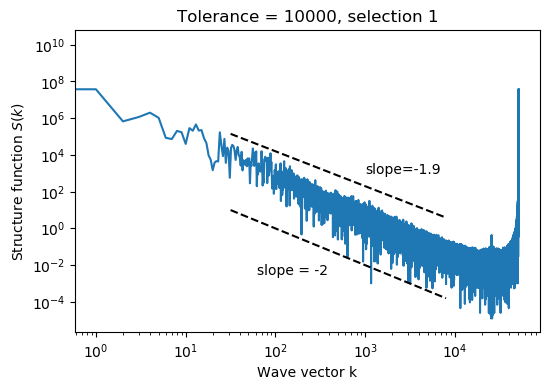

In [19]:
# Calculate for single image
h_all = mydata_interface_0[0]; # x-positions give interface height
S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT

# Plot dynamic structure factor S(k)
plt.figure(dpi=100)
plt.plot(S_all)
plt.xscale('log')
plt.yscale('log')
plt.title("Tolerance = " + str(tolerance) + ", selection " + str(sample))
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')

# Plot power laws 
exponent = -2;
c = (10**4);
k_range = 10**np.arange(1.5, 4, 0.2);
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
plt.text(10**(1.8), 10**(-2.5), 'slope = ' + str(exponent) )
#plt.text(10**(1.8), 10**(-2.5), 'alpha = ' + str( round(-(exponent+1)/2, 3) ) )

exponent2 = -1.9;
c2 = (10**8)
S_range2 = c2*k_range**exponent2;
plt.plot(k_range, S_range2, 'k--')
plt.text(10**(3), 10**3, 'slope=' + str( exponent2 ) )
#plt.text(10**(3), 10**3, 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

# Save image
fname_out = save_folder + im_label + label_0 + "structure_factor";
ext = ".png";
plt.savefig(fname_out + ext)

plt.show()

The slope of the above function equals $- (2 \alpha + 1)$, so we get $\alpha = -(1+\text{slope})/2$. <br> 

For a slope of $-2$ we get $\alpha = 0.5$. <b> This is precisely the value corresponding to KPZ!</b> Need to check other exponents as well.

<b>Note</b>: Result is very noisy because we are taking a single snapshot. 

<font color="blue">
    To do: 
    <ol>
        <li>Average over more images to get a more smooth structure factor. Also check that individual images have comparable scaling.</li>
        <li>Obtain z from method mentioned above.</li>
    </ol>
</font>

#### Plot for different tolerances

<Figure size 900x600 with 0 Axes>

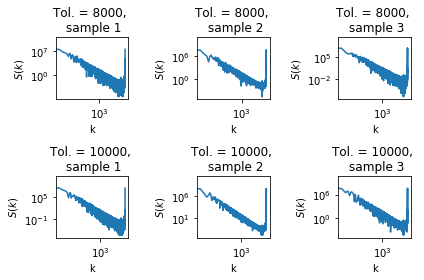

In [14]:
plt.figure(dpi=150)
fig, axes = plt.subplots(nrows=tolerances_all.size, ncols=selections_all.size)
for idx in np.arange(len(parameters_all)):
    h_all = mydata_interface_all[idx][0];
    this_S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT
    this_label = "Tol. = " + str(parameters_all[idx][0]) + ", \n sample " + str(parameters_all[idx][1]);
    
    plt.subplot(tolerances_all.size, selections_all.size, idx+1)
    plt.plot(this_S_all, label=this_label)  
    plt.title(this_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('$S(k)$')  
    
fig.tight_layout()

# Save image
fname_out = save_folder + im_label + "structure_factor_all";
ext = ".pdf";
#plt.savefig(fname_out + ext)

plt.show()

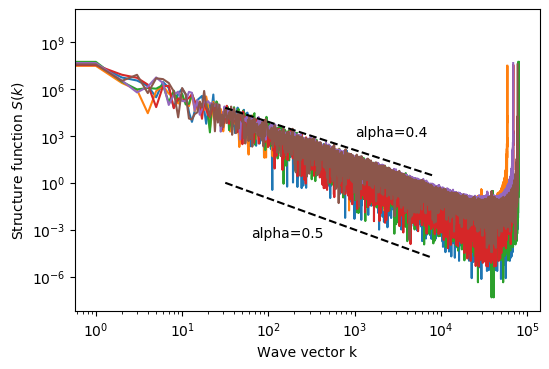

In [15]:
plt.figure(dpi=100)
for idx in np.arange(len(parameters_all)):
    h_all = mydata_interface_all[idx][0];
    this_S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT
    this_label = "Tolerance = " + str(parameters_all[idx][0]) + ", sample " + str(parameters_all[idx][1]);
    
    plt.plot(this_S_all, label=this_label)  
    
# Plot power laws 
exponent = -2;
c = (10**3);
k_range = 10**np.arange(1.5, 4, 0.2);
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
plt.text(10**(1.8), 10**(-3.5), 'alpha='+ str( round(-(exponent+1)/2, 3) ) )

exponent2 = -1.8;
c2 = (10**7.5)
S_range2 = c2*k_range**exponent2;
plt.plot(k_range, S_range2, 'k--')
plt.text(10**(3), 10**3, 'alpha='+ str( round(-(exponent2+1)/2, 3) ) )

plt.xscale('log')
plt.yscale('log')
#plt.title('Structure function from 1 image')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()

# Save image
fname_out = save_folder + im_label + "structure_factor_all_together";
ext = ".png";
#plt.savefig(fname_out + ext)

plt.show()

#### Fourier space length scales
Relate $k$ to real length scale. For FFT, the decomposition is made up of waves of the form $e^{-i 2\pi k n/N}$. The length scale in the discrete set of values is then $N/k$, the typical distance between two values $L/N$, so the length scale in real space is $L/k$, where $L$ is the total length of the system.
<br>

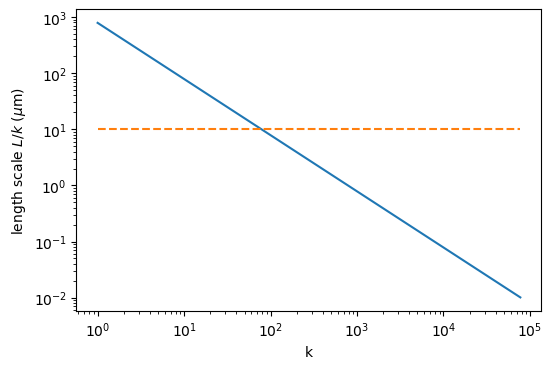

In [19]:
N = np.size(h_all);
k_all = np.arange(1, N);
lengths_all = L/np.arange(1, N);
cell_size = 10; # cell size is approx. 10 microns

plt.figure(dpi=100)
plt.plot( np.arange(1,N), lengths_all )
plt.plot( np.array([1, N]), np.array([cell_size, cell_size]), '--' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('length scale $L/k$ ($\mu$m)')

plt.show()

Hence, only first part of structure function counts. Verified by back-of-envelope calculation for "270120" image: <br>
Image has roughly 8000 pixels, and 10 pixel/micron. Cells are around 10 microns in diameter, so 100 pixels. Wave mode corresponding to 100 pixels then has $k = 8000/100 = 80$. Hence all $k > 80$ is irrelevant.

## Analyse islands
<b>Goal</b>: determine distribution and properties of cells ahead of the front. <br>
<b>Hypothesis</b>: distribution is not exponential, because differentiation is a cooperative phenomenon.<br>
<b>Method</b>: Use Cell Counter in Fiji to manually label the (xy-position of the) outlying islands. Analyze results.

In [31]:
# Load XY positions from saved file
fname_in = "/Users/dang/Documents/TablerLab/Data_Adrian_270120/Data_islands/270120_Cell_counter_islands_Osx1GFP_maxIntensity.csv";
data_islands = pd.read_csv(fname_in, header = None, delimiter = ";");
data_islands = data_islands/pix_per_micron; # express distances in microns

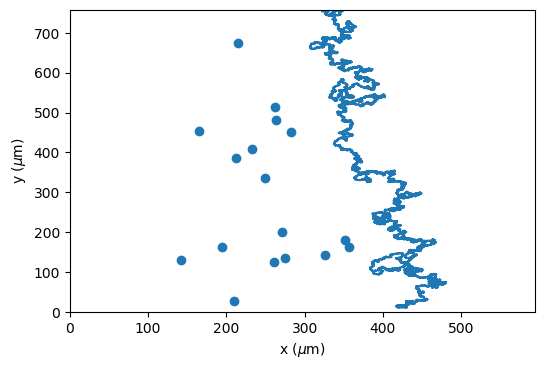

In [47]:
# Plot islands together with interface
h = plt.figure(2, dpi = 100);
p1 = plt.plot(mydata_interface_0[0], mydata_interface_0[1], label='Interface');
p2 = plt.scatter(data_islands[0], data_islands[1], label='Islands');
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
plt.xlim(0, size[0])
plt.ylim(0, size[1])
#plt.legend([p1,p2], ["A", "B"])

# Save image
fname_out = save_folder + im_label + "interface_w_islands";
ext = ".png";
plt.savefig(fname_out + ext)

plt.show();

#### (1) Count islands

In [36]:
print("Number of islands N_i = " + str(data_islands.shape[0]) )
print("Island density N_i/L = " + str(round(data_islands.shape[0]/size[0], 3)) + " islands per micron" )

Number of islands N_i = 17
Island density N_i/L = 0.029 islands per micron


#### (2) Get nearest-neighbour distances

In [37]:
# Compute NN distances
x_all = data_islands[0];
y_all = data_islands[1];
x_all = x_all[:, np.newaxis]; # add axis to array
y_all = y_all[:, np.newaxis];
dy_all = np.abs(y_all.T - y_all); # all distances in y
d_all = np.sqrt((x_all.T - x_all)**2 + (y_all.T - y_all)**2); # Euclidean distances
dy_min_all = np.sort(dy_all, 1)[:, 2]; # Nearest distance in y
d_min_all = np.sort(d_all, 1)[:, 2]; # Nearest Euclidean distance
#print(d_min_all)

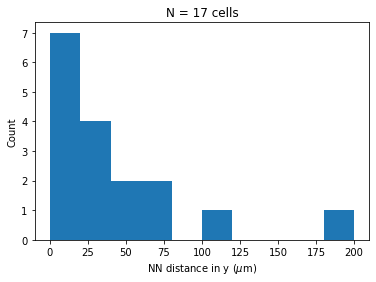

In [39]:
# Plot distribution
fig = plt.figure()
plt.hist(dy_min_all, bins=np.arange(0, 201, 20))
plt.xlabel('NN distance in y ($\mu$m)')
plt.ylabel('Count')
plt.title('N = ' + str(data_islands[0].size) + ' cells')

# Save image
fname_out = save_folder + im_label + "Islands_NN_Distribution";
ext = ".png";
plt.savefig(fname_out + ext)

plt.show()

# Summary statistics
dy_min_all_df = pd.DataFrame(dy_min_all, columns=['Data'])
#print(dy_min_all_df.describe())

<b>Observation</b>: distribution could still approximate exponential, but we need far more statistics to determine this.